In [1]:
import pandas as pd
import tensorflow as tf
import os
from sklearn.preprocessing import LabelEncoder

# load CSV 
df = pd.read_csv("/Users/sunghyunkim/Desktop/ReCloset.v3i.tensorflow/train/_annotations.csv")  # 예시: Roboflow에서 받은 train 라벨 CSV

# class encoding 
le = LabelEncoder()
df['label_id'] = le.fit_transform(df['class'])
class_names = le.classes_
num_classes = len(class_names)

image_paths = df['filename'].unique()

# Data transformation for TF Dataset
def load_data(df, img_dir=""):
    images = []
    targets = []

    for img_path in image_paths:
        full_path = os.path.join(img_dir, img_path)
        img = tf.io.read_file(full_path)
        img = tf.image.decode_jpeg(img, channels=3)
        img = tf.image.resize(img, (416, 416)) / 255.0

        labels = df[df['filename'] == img_path]
        boxes = labels[['xmin', 'ymin', 'xmax', 'ymax']].values / 416.0
        class_ids = labels['label_id'].values

        target = {
            'boxes': boxes,
            'class_ids': class_ids
        }

        images.append(img)
        targets.append(target)
    
    return images, targets

train_images, train_targets = load_data(df, img_dir="train")

2025-04-10 00:37:34.193551: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-04-10 00:37:34.193630: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-04-10 00:37:34.193645: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-04-10 00:37:34.193731: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-10 00:37:34.193765: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [17]:
import tensorflow as tf
from keras import models, layers

def build_model(input_shape=(416, 416, 3), num_classes=7):
    model = models.Sequential([
        layers.Input(shape=input_shape),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

In [ ]:
import numpy as np
y_train = np.array(train_images)

In [20]:
model = build_model(num_classes=num_classes)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# data 
X_train = tf.stack(train_images)
y_train = [target['class_ids'][0] for target in train_targets] 


In [21]:
X_train

<tf.Tensor: shape=(477, 416, 416, 3), dtype=float32, numpy=
array([[[[0.71181697, 0.6726013 , 0.71573853],
         [0.71815753, 0.67894185, 0.7220791 ],
         [0.71822715, 0.67901146, 0.7221487 ],
         ...,
         [0.9464554 , 0.9346907 , 0.9150829 ],
         [0.94509804, 0.93333334, 0.9137255 ],
         [0.94223225, 0.93046755, 0.9108597 ]],

        [[0.70870167, 0.669486  , 0.71262324],
         [0.68719685, 0.64798117, 0.6911184 ],
         [0.67035615, 0.6311405 , 0.6742777 ],
         ...,
         [0.9464554 , 0.9346907 , 0.9150829 ],
         [0.94509804, 0.93333334, 0.9137255 ],
         [0.94223225, 0.93046755, 0.9108597 ]],

        [[0.69711107, 0.6578954 , 0.70103264],
         [0.70031327, 0.6610976 , 0.70423484],
         [0.702216  , 0.66300035, 0.7061376 ],
         ...,
         [0.9464554 , 0.9346907 , 0.9150829 ],
         [0.94509804, 0.93333334, 0.9137255 ],
         [0.94223225, 0.93046755, 0.9108597 ]],

        ...,

        [[0.06265787, 0.11635301

In [22]:
y_train

[5,
 4,
 4,
 6,
 4,
 4,
 6,
 4,
 5,
 1,
 5,
 6,
 3,
 4,
 6,
 5,
 4,
 1,
 4,
 6,
 5,
 4,
 2,
 1,
 4,
 5,
 5,
 0,
 5,
 4,
 6,
 4,
 5,
 6,
 2,
 1,
 4,
 3,
 1,
 2,
 1,
 4,
 4,
 6,
 4,
 4,
 2,
 6,
 1,
 5,
 4,
 2,
 2,
 6,
 4,
 1,
 4,
 2,
 0,
 3,
 5,
 6,
 6,
 6,
 0,
 0,
 3,
 1,
 3,
 3,
 6,
 5,
 4,
 5,
 4,
 6,
 2,
 6,
 6,
 0,
 3,
 6,
 5,
 4,
 6,
 5,
 3,
 2,
 3,
 1,
 4,
 6,
 4,
 1,
 2,
 4,
 6,
 3,
 4,
 6,
 5,
 6,
 5,
 4,
 5,
 6,
 4,
 3,
 5,
 6,
 3,
 3,
 5,
 5,
 6,
 3,
 4,
 4,
 4,
 4,
 3,
 1,
 1,
 6,
 1,
 2,
 1,
 3,
 5,
 1,
 3,
 5,
 4,
 0,
 4,
 4,
 4,
 3,
 6,
 2,
 4,
 6,
 3,
 4,
 0,
 1,
 4,
 3,
 3,
 6,
 1,
 6,
 4,
 2,
 4,
 4,
 4,
 4,
 1,
 3,
 0,
 5,
 3,
 2,
 3,
 3,
 6,
 2,
 6,
 1,
 5,
 6,
 3,
 3,
 2,
 6,
 4,
 6,
 2,
 6,
 5,
 6,
 1,
 5,
 5,
 4,
 4,
 2,
 4,
 6,
 4,
 4,
 6,
 6,
 3,
 1,
 3,
 4,
 6,
 4,
 4,
 6,
 4,
 3,
 5,
 4,
 5,
 6,
 5,
 6,
 5,
 3,
 4,
 4,
 4,
 1,
 4,
 6,
 4,
 5,
 5,
 4,
 3,
 5,
 5,
 3,
 4,
 6,
 4,
 6,
 3,
 6,
 4,
 1,
 4,
 4,
 4,
 6,
 6,
 5,
 6,
 6,
 4,
 0,
 4,
 4,
 4,
 0,
 6,
 3,


In [23]:
y_train = tf.convert_to_tensor(y_train)

In [31]:
result = model.fit(X_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 14s 992ms/step - accuracy: 0.9923 - loss: 0.0703 - val_accuracy: 0.9792 - val_loss: 0.0598
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 801ms/step - accuracy: 0.9959 - loss: 0.0542 - val_accuracy: 0.9792 - val_loss: 0.0606
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 783ms/step - accuracy: 1.0000 - loss: 0.0431 - val_accuracy: 0.8646 - val_loss: 0.5995
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 816ms/step - accuracy: 0.9022 - loss: 0.2729 - val_accuracy: 0.8333 - val_loss: 0.5306
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 816ms/step - accuracy: 0.9369 - loss: 0.2988 - val_accuracy: 0.8438 - val_loss: 0.3571
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 766ms/step - accuracy: 0.9586 - loss: 0.2566 - val_accuracy: 0.7812 - val_loss: 0.6330
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 791ms/step - accuracy: 0.8663 - loss: 0.4873 - val_accuracy: 0.8646 - val_loss: 0.6722
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 804ms/step - accuracy: 0.9685 - loss: 0.1944 - val_accura

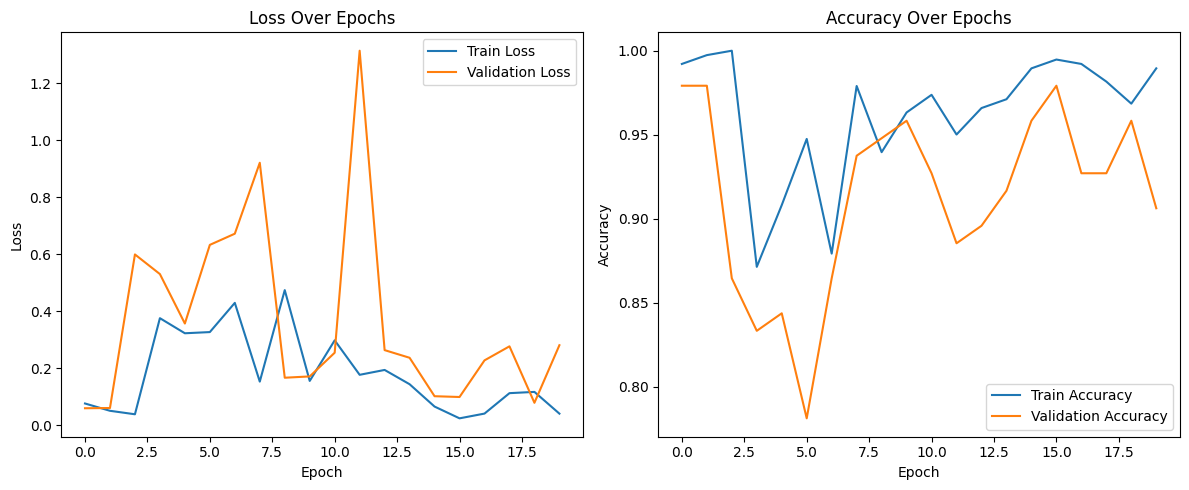

In [32]:
import matplotlib.pyplot as plt

# Loss visualization 
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(result.history['loss'], label='Train Loss')
if 'val_loss' in result.history:
    plt.plot(result.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy visualization 
plt.subplot(1, 2, 2)
plt.plot(result.history['accuracy'], label='Train Accuracy')
if 'val_accuracy' in result.history:
    plt.plot(result.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

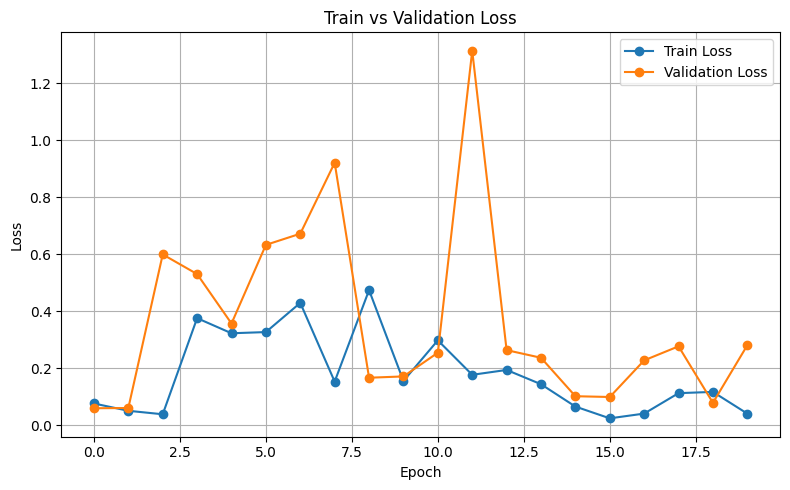

In [33]:
plt.figure(figsize=(8, 5))
plt.plot(result.history['loss'], label='Train Loss', marker='o')
plt.plot(result.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Train vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [34]:
# model saved 
model.save('/Users/sunghyunkim/Desktop/ReCloset.v3i.tensorflow/reclosetmodel.h5')
print("✅ model saved completed ")

✅model saved completed 
